# Matplotlib 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Damit die von Matplotlib erzeugten Bilder gleich im Notebook erscheinen, braucht man das folgende "magic command": 

In [2]:
%matplotlib notebook

Es gibt auch die ältere Variante 

`%matplotlib inline`

Geplottet werden prinzipiell Daten (Wertetabellen).  Um eine Funktion zu plotten, muss man eine Wertetabelle herstellen,
was mit `numpy` recht leicht geht. Aber fangen wir erst mal mit Daten an.


## Einfache Plots

<IPython.core.display.Javascript object>


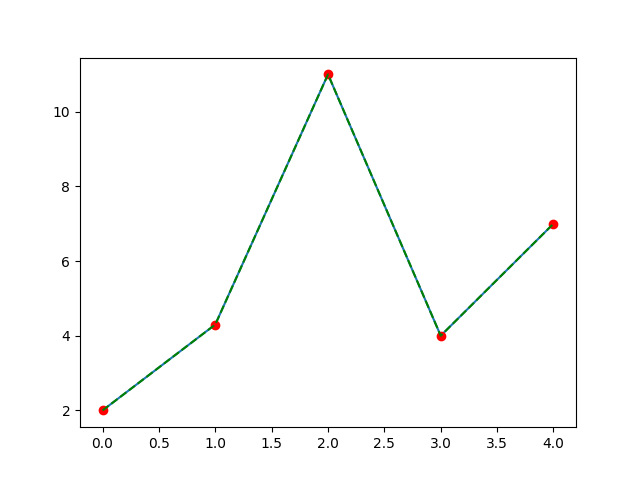

In [3]:
# ganz schnell mal ein Plot
y = [2, 4.3, 11, 4, 7]
plt.plot(y)
plt.show()

Wenn Sie dieses Notebook interaktiv abarbeiten, erscheint die obige Grafik mit einem Rahmen, der verschiedene Buttons enthält. Mit ihnen kann man z.B.  zoomen oder die Grafik verschieben. 

Mit dem Button rechts über der Grafik wird diese interaktive Funktionalität beendet. 

*Bitte drücken Sie immer diesen Button,* bevor Sie die nächste Zelle abarbeiten. Sonst wird kein neues Plotfenster aufgemacht sondern der nächste Plot zum oben stehenden hinzugefügt.   

<IPython.core.display.Javascript object>


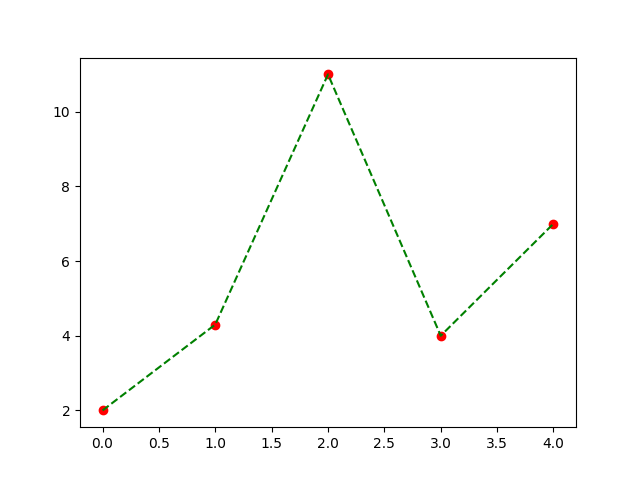

In [5]:
# Ein paar Variationen:

y = [2, 4.3, 11, 4, 7]
plt.plot(y, color = 'red',   marker = 'o', linestyle = '')  # rote Datenpunkte
plt.plot(y, color = 'green', linestyle = '--')   # verbindende grüne gestrichelte Linie
plt.show()                                                

## Bemerkungen:


* Linestyles: 
  * `'--'` (gestrichelt)
  * `':'` (Punkte) 
  * `'-.'` (Strich-Punkt)
  * `'-'` (durchgezogen, *default*)
  * `''`   (nix)

* Marker: http://matplotlib.org/api/markers_api.html

* Farben können u.a. auch RGB-Tupels: `color = (0.23, 0.44, 0.99)`
  oder Hex-Codes: `color='#e30c03'` sein.

* Matplotlib hat eine Vielzahl von *backends*, also Ausgabemechanismen für Grafiken. In diesem notebook-Backend ist z.B. das abschliessende `.show()` unnötig. Ich schreibe es trotzdem, damit die Beispiele auch mit anderen *backends* funktionieren.

* Im interaktiven Notebook stehen Buttons unter dem Plot. Man kann damit die Plots verschieben/zoomen und dann auch in der gewünschten Form als Grafik abspeichern. 

<IPython.core.display.Javascript object>


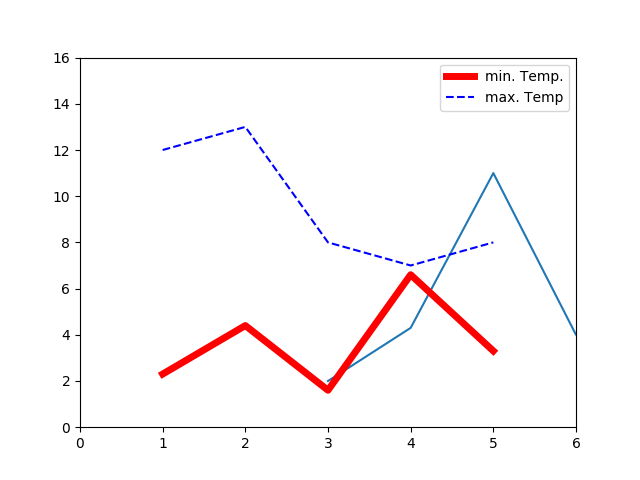

In [6]:
# wenn die x-Werte nicht einfach 0,...,n sind:

x = [3,   4,  5, 6, 10]
y = [2, 4.3, 11, 4,  7]
plt.plot(x, y)
plt.show()

In [7]:
# noch ein paar Schnörkel: 
#
#  - Achsenbeschriftung mit xlabel, ylabel
#         (In allen Beschriftungs-Strings können LaTeX-Konstrukte 
#          wie $\sqrt{\alpha}$ verwendet werden)
#
#  - Kurzformen: '-r'  entspricht   linestyle='-', color='red'
#                '--b' entspricht   linestyle='--', color='red'
#
#  - Bereich der x,y-Achse festgelegt: .xlim([xmin,xmax])
#        (muss nach dem plot()-Befehl geschehen)
#
#  - Legende im Plot 
#
#  - Abspeichern als Grafikdatei
#

days = range(1,6)
Tmin = [2.3, 4.4,1.6,6.6,3.3]
Tmax = [12,13,8,7,8]

#plt.xlabel("Tage")
#plt.ylabel(r"Temperatur $\theta$")
#plt.plot(days, Tmin, '-r', linewidth = '5', label = "min. Temp.")
plt.plot(days, Tmin, '-r', linewidth=5,label="min. Temp.")
plt.plot(days, Tmax, '--b', label = "max. Temp")
plt.xlim([0, 6])
plt.ylim([0, 16])
plt.legend(loc = 'upper right')
#plt.savefig("fig1.png")
plt.show()

## 2D Punktmengen (Scatterplot)

<IPython.core.display.Javascript object>


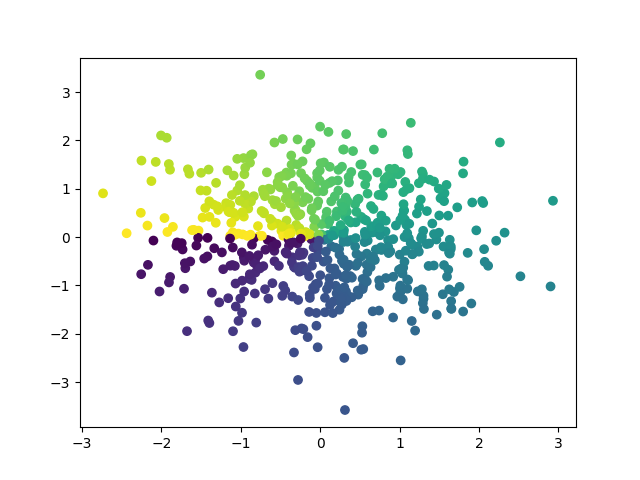

In [8]:
# 2 Arrays mit je 600 normalverteilte Zufallszahlen 

n = 600
X = np.random.normal(0, 1 ,n)
Y = np.random.normal(0, 1, n)

# die 600 Punkte sollen nach ihrem Winkel eingefärbt werden 
Phi = np.arctan2(Y, X)

plt.scatter(X, Y, c = Phi)
plt.show()

<IPython.core.display.Javascript object>


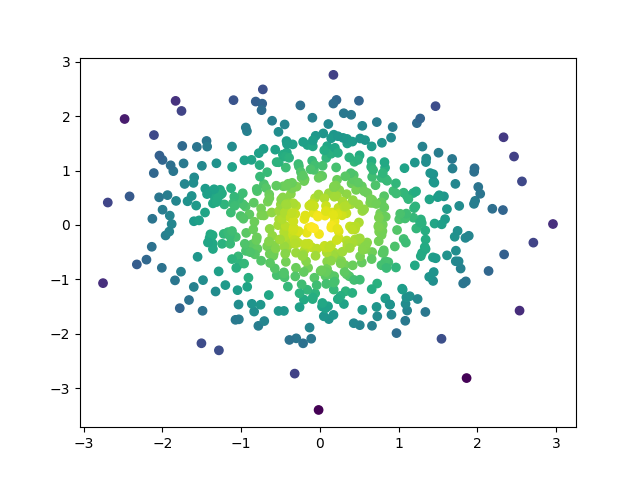

In [9]:
# 2 Arrays mit je 600 normalverteilte Zufallszahlen 

n = 600
X = np.random.normal(0, 1 ,n)
Y = np.random.normal(0, 1, n)

# die 600 Punkte sollen nach ihrem Abstand zu (0,0) eingefärbt werden
D = np.sqrt(X**2 + Y**2)

plt.scatter(X, Y, c = -D)
plt.show()

## Die saubere Variante


Bisher wurden alle Plots einfach in das gerade aktive Plotfenster gemalt. Für etwas kompliziertere Plots sollte man sich etwas mehr Mühe geben. 

Grundprinzip:

* plt.figure() erzeugt ein Abbildungs-Objekt, auf das man sich später bezieht: `fig23=plt.figure()`
* Diesem Objekt fügt man ein oder mehrere Subplots hinzu: `p1=fig23.add_subplot(111)`

  Dabei bedeutet das Argument `nmk`, das dies der  `k`-te Subplot in einem `n x m`-Raster ist.
* Einem Subplot fügt man dann mittels `.plot(), .scatter(),...` eine oder
mehrere  Graphen hinzu: `p1.plot(x,y)`   
* Auf einem Subplot operieren dann Funktionen wie `.set_xlim()` oder `.set_title()`.


*Damit ist es auch nicht mehr nötig, die interaktiven Fenster um jeden Graph abzuschalten, wenn man einen neuen Graphen generieren will.* Jeder `.figure()`-Aufruf erzeugt ein neues interaktives Fenster.   

<IPython.core.display.Javascript object>


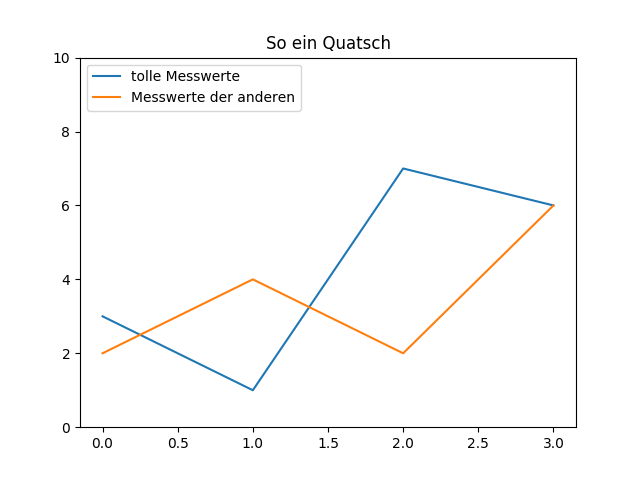

In [10]:
# 
fig1 = plt.figure()
subplot1 = fig1.add_subplot(111)
subplot1.plot([3,1,7,6], label = "tolle Messwerte")
subplot1.plot([2,4,2,6], label = 'Messwerte der anderen')
subplot1.set_ylim(0,10)
subplot1.set_title("So ein Quatsch")
subplot1.legend(loc = 'upper left')
fig1.show()

<IPython.core.display.Javascript object>


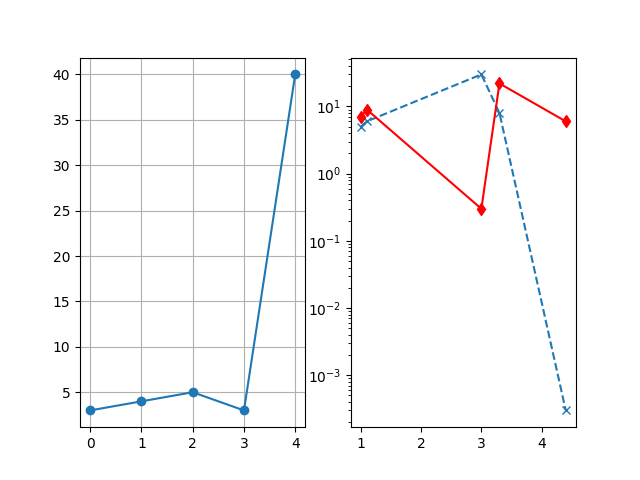

In [11]:
# Hier gibt es mal 2 Subplots in einem 1x2-Raster.
# ... und eine logarithmische Achse 
# ... und ein Grid (Hilfslinien)

fig2=plt.figure()
sp1=fig2.add_subplot(121)       # 1x2-raster, 1. subplot -> 121
sp2=fig2.add_subplot(122)       # 1x2-Raster, 2. Subplot -> 122 
sp1.plot([3,4,5,3,40], marker='o')
sp2.plot([1, 1.1, 3, 3.3, 4.4], [5,6,30,8,.0003], marker='x', linestyle='--')
sp2.plot([1, 1.1, 3, 3.3, 4.4], [7,9,0.3, 22, 6], marker='d', color='r')
sp2.set_yscale('log')
sp1.grid(True)
fig2.show()

## Funktionsplots

Beim Erstellen von Funktionsplots helfen die vektorisierten Numpy-Funktionen.

Die Funktion `linspace(Anfang, Ende, Anzahl der Punkte)` erzeugt einen Vektor mit Stützstellen: 

In [12]:
x=np.linspace(0, 6, 9)
print("x=", x)
print("x**2=", x**2)          

x= [0.   0.75 1.5  2.25 3.   3.75 4.5  5.25 6.  ]
x**2= [ 0.      0.5625  2.25    5.0625  9.     14.0625 20.25   27.5625 36.    ]


Die Funktionen aus Numpy, wie z.B. `np.sin()`, sind vektorisiert, d.h., sie wirken elementweise auf einen Array.  

<IPython.core.display.Javascript object>


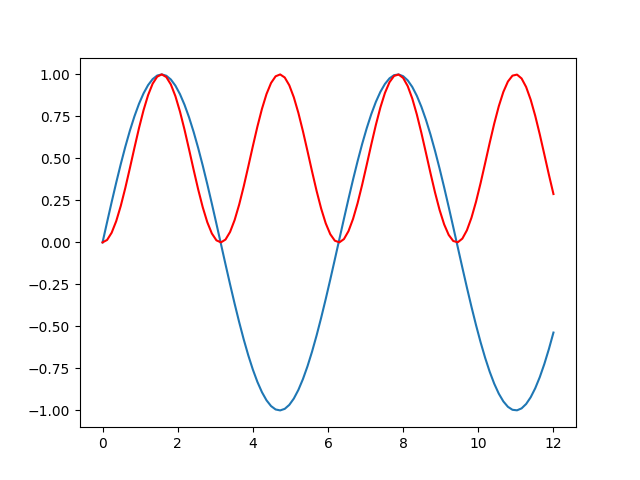

In [13]:
x = np.linspace(0,12,100)
y = np.sin(x)

fig3   = plt.figure()
splot3 = fig3.add_subplot(111)
splot3.plot(x,y)
splot3.plot(x, y**2, 'r')
fig3.show()

## Funktionen von 2 Veränderlichen

Zum Plotten von Funktionen von 2 Veränderlichen `z=f(x,y)` braucht Matplotlib 3 Matrizen, welche jeweils die x-, y- und z-Werte zu jedem Datenpunkt enthalten. Zur Erzeugung dieser Matrizen kann man die Numpy-Funktion `meshgrid()` benutzen:

In [14]:
x = np.linspace(1,5,5) 
x

array([1., 2., 3., 4., 5.])

In [15]:
y = np.linspace(0, 3, 4)
y

array([0., 1., 2., 3.])

In [16]:
X, Y = np.meshgrid(x, y)
X

array([[1., 2., 3., 4., 5.],
       [1., 2., 3., 4., 5.],
       [1., 2., 3., 4., 5.],
       [1., 2., 3., 4., 5.]])

In [17]:
Y

array([[0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2.],
       [3., 3., 3., 3., 3.]])

In [18]:
Z = X**2 + Y**2
Z

array([[ 1.,  4.,  9., 16., 25.],
       [ 2.,  5., 10., 17., 26.],
       [ 5.,  8., 13., 20., 29.],
       [10., 13., 18., 25., 34.]])

<IPython.core.display.Javascript object>


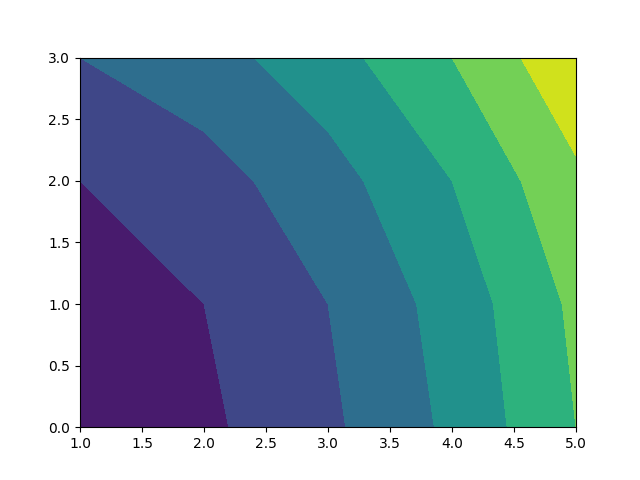

In [19]:
fig17 = plt.figure()
p17 = fig17.add_subplot(111)
p17.contourf(X,Y,Z)
fig17.show()

<IPython.core.display.Javascript object>


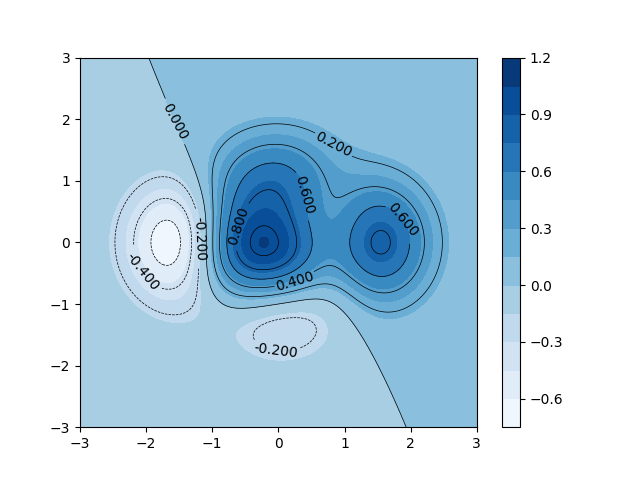

In [21]:
# Und noch ein Beispiel

def f(x,y):
    return (1 - x/2 + x**5 + y**3) * np.exp(-x**2 - y**2)

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X, Y = np.meshgrid(x, y)

fig7 = plt.figure()
pp7  = fig7.add_subplot(111)

img = pp7.contourf(X, Y, f(X,Y), 12, cmap='Blues') 
 # andere cmaps: hot, summer, winter, spring, gray, Blues
   # 12 ist die Zahl der Farbabstufungen
    
hl = pp7.contour(X, Y, f(X,Y), 8, colors='black', linewidths=.5)  
   # macht Höhenlinien (8 Abstufungen)

plt.clabel(hl, inline=1, fontsize=10)     
   # beschriftet Höhenlinien

fig7.colorbar(img)
   # macht Farbbalken rechts daneben                

fig7.show()

Weitere colormaps gibts hier: http://matplotlib.org/examples/color/colormaps_reference.html


## Und jetzt in 3D!

* dazu müssen wir noch was importieren!
* Der Subplot erhält das Attribut `projection='3d'`
* Die Plotfunktion heisst `.plot_surface(x,y,z)`
  

<IPython.core.display.Javascript object>


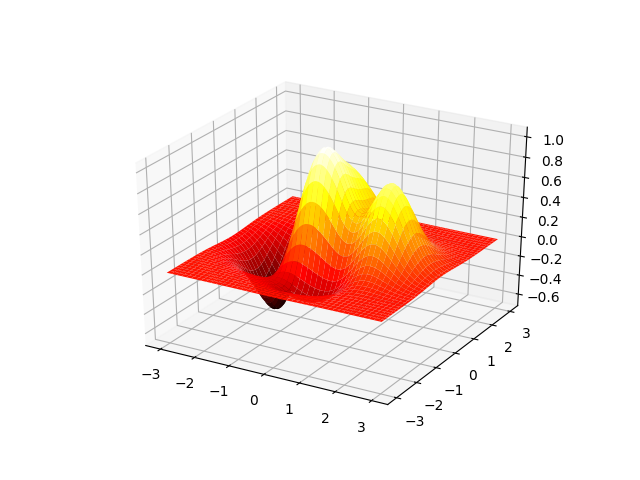

In [22]:
from mpl_toolkits.mplot3d import Axes3D

fig71  = plt.figure()
plot71 = fig71.add_subplot(111, projection='3d')
plot71.plot_surface(X, Y, f(X,Y), cmap='hot')
fig71.show()

<IPython.core.display.Javascript object>


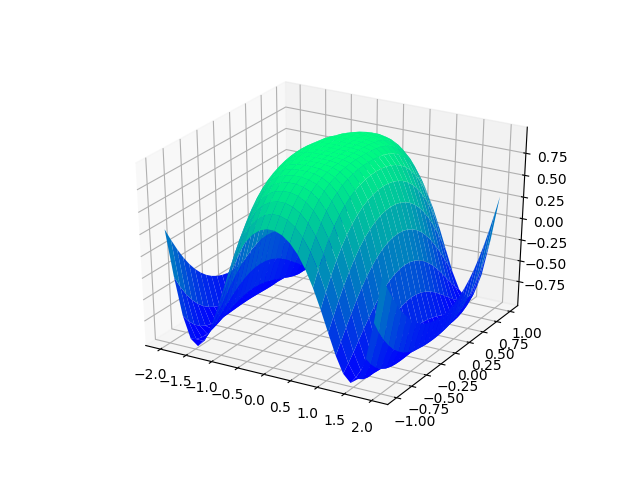

In [23]:
# Noch ein Beispiel
# Zur Einnerung nochmal alle nötigen Imports:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



x = np.linspace(-2, 2, 30)
y = np.linspace(-1, 1, 25)
(X, Y) = np.meshgrid(x,y)

Z = np.cos(X**2 + Y**2)

fig8 = plt.figure()
plot8 = fig8.add_subplot(111, projection='3d')


# die Wirkung der Argumente 'rstride' und 'cstride' probiere man einfach mal aus
# (müssen ganze Zahlen > 0 sein)

plot8.plot_surface(X, Y, Z, cmap='winter', rstride=1, cstride=1, linewidth=1)
fig8.show()

* Die Plotfunktion heisst `.plot_surface(x,y,z)`
* ... oder `.plot_wireframe(x,y,z)`, wenn man es nicht so bunt mag

<IPython.core.display.Javascript object>


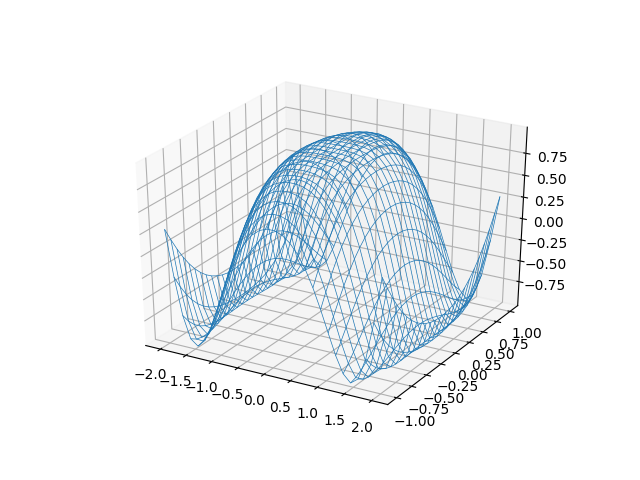

In [24]:
fig8a = plt.figure()
plot8a = fig8a.add_subplot(111, projection='3d')


plot8a.plot_wireframe(X, Y, Z, rstride=1, cstride = 1, linewidth=0.5)
fig8a.show()

## Vektorfelder

Neben vielem anderen kann man auch Vektorfelder plotten.  

(quiver = Köcher) 

<IPython.core.display.Javascript object>


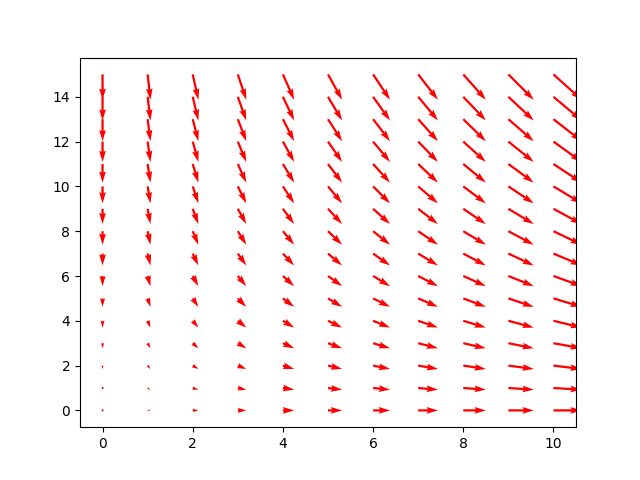

In [25]:
x = np.linspace(0, 10, 11)
y = np.linspace(0, 15, 16)
(X,Y) = np.meshgrid(x,y)
u = 25*X
v = -15*Y
fig18 = plt.figure()
splot18 = fig18.add_subplot(111)
splot18.quiver(x, y, u, v, color='r')
fig18.show()

## 3D Plots von Punktmengen und Kurven

<IPython.core.display.Javascript object>


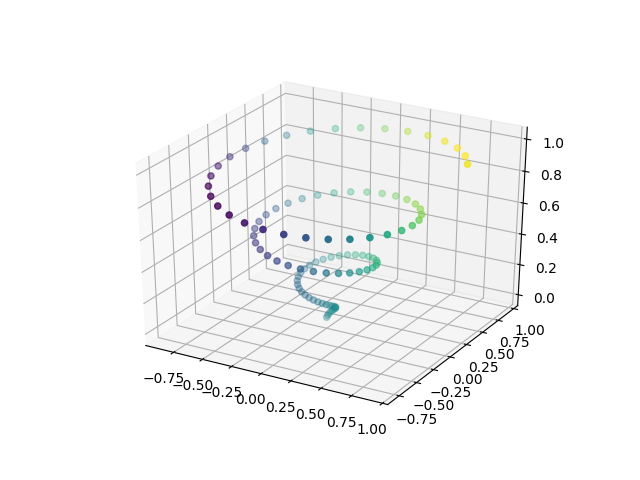

In [26]:
fig30 = plt.figure()
pl = fig30.add_subplot(111, projection='3d')

z = np.linspace(0, 1, 100)
x = z * np.sin(20 * z)
y = z * np.cos(20 * z)

co = x + y

pl.scatter(x, y, z, c=co)
fig30.show()

<IPython.core.display.Javascript object>


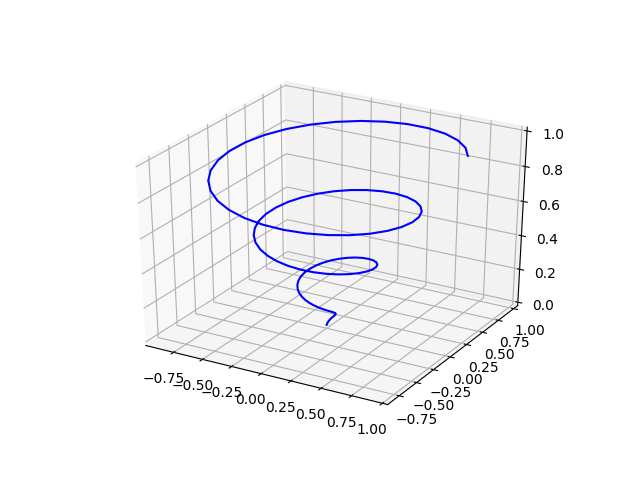

In [27]:
fig31 = plt.figure()
pl2 = fig31.add_subplot(111, projection='3d')

pl2.plot(x, y, z, '-b')
fig31.show()

### Interaktive Plots
Als nächstes fügen wir einem Plot einen Schieberegler (Slider) hinzu. Mit diesem 
slider kann man den Wert einer Variablen interaktiv verstellen. Dann wird der Plot
von einer update-Funktion neu gezeichnet. 

Erstmal noch 2 Imports:

In [28]:
from matplotlib.widgets import Slider
from matplotlib import gridspec

<IPython.core.display.Javascript object>


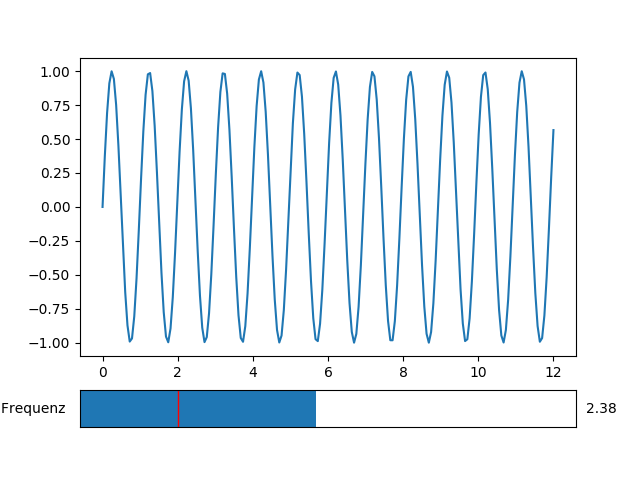

0

In [29]:
x = np.linspace(0,12,200)
y = np.sin(x)

fi4 = plt.figure()

# Der eigentliche Plot und der Slider sollen übereinander stehen. 
# Mit einem einfachen 2x1-Raster werden sie aber gleich hoch.
# Wir erzeugen das Raster daher mit gridspec, da kann man ein 
# Höhenverhältnis angeben. 

gs = gridspec.GridSpec(2, 1, height_ratios=[8, 1]) 

plot41 = fi4.add_subplot(gs[0])   # anstelle von 211, 212 
plot42 = fi4.add_subplot(gs[1])

plot41.plot(x,y)

# Der Slider füllt einen Subplot, hat einen Namen und Min-, Max- und Startwert
sl = Slider(plot42, 'Frequenz ', 0.01, 5.0, valinit=1)
fi4.show()

# Diese update-Funktion zeichnet den Graph neu:  
def myupdate(val):
    y = np.sin(val*x)        # val ist der am Schieberegler eingestellte Wert
    plot41.cla()             # alten subplot löschen
    plot41.plot(x,y)         # neu zeichnen
    fi4.canvas.draw_idle()   # 

# hier wird dem slider gesagt, dass er bei Änderungen die Funktion myupdate rufen soll    
sl.on_changed(myupdate)


In [30]:
# die update-Funktion kann man natürlich auch so aufrufen:
myupdate(1)

## Animationen

Auf diese Weise lassen sich einfache Animationen realisieren. 

In [31]:
def update2(val):
    y = np.sin(val*x)
    plot41.cla()        # clear plot
    plot41.plot(x,y)    # new plot
    fi4.canvas.draw()   # kleiner Unterschied zu myupdate!

import time

for i in range(1, 20):
    update2(i/3)
    time.sleep(.03)     # wichtig: zwischen den updates eine kleine Pause (0,03 sec) machen!

(Die Animation sieht man nur, wenn man das Notebook interaktiv abarbeitet.)

## Ende 

Falls Matplotlib nicht reicht: Eine auf matplotlib aufbauende Visualisierungsbibliothek ist z.B. Seaborn:
http://seaborn.pydata.org/